In [1]:
from objetos import *
from function import *
import pandas as pd 
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
list_comp,attributes=readFile(excel_file='Teste.xlsx')

Component created named motor
Component created named fan
Component created named heater
Component created named nozzle
Component created named body
Atribute named geometry linked to motor
Atribute named material linked to motor
Atribute named power linked to motor
Atribute named temperature linked to motor
Atribute named geometry linked to fan
Atribute named rot.speed linked to fan
Atribute named material linked to fan
Atribute named power linked to fan
Atribute named geometry linked to heater
Atribute named material linked to heater
Atribute named power linked to heater
Atribute named temperature linked to heater
Atribute named geometry linked to nozzle
Atribute named material linked to nozzle
Atribute named temperature linked to nozzle
Atribute named geometry linked to body
Atribute named material linked to body


In [3]:
links=createMatrix(attributes_list=attributes,random=False)
links

array([[[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
  

### Here there are 2 options:
- Generate random conections
- Generate manually connections

#### Randomly
You can use a argument on __createMatrix__ called _random_ as __True__. It will also generate a random matrix list $\\$
Also, you can add parameters on __createLinksRandom__ such as __time_max__ and __risk_max__ to alterate default values 

In [4]:
createLinksRandom(matrix=links,attributes_list=attributes)

array([[[ 0,  0],
        [ 0,  0],
        [ 7,  5],
        [46,  3],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [52,  3],
        [ 0,  0],
        [42,  4],
        [ 0,  0],
        [ 0,  0],
        [52,  2],
        [ 0,  0]],

       [[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [99,  4],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0]],

       [[ 7,  5],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [47,  2],
        [ 0,  0],
        [ 0,  0],
        [ 9,  1],
        [71,  4],
        [ 5,  5],
        [54,  1],
        [13,  4],
        [69,  4],
        [ 0,  0],
        [17,  3]],

       [[46,  3],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
    

#### Manually

In [5]:
# createLink(matrix=links,attribute1=attributes[0], attribute2=attributes[1],attribute_list=attributes, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributes[2], attribute2=attributes[3],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[4], attribute2=attributes[5],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[6], attribute2=attributes[7],attribute_list=attributes, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributes[8], attribute2=attributes[9],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[10], attribute2=attributes[11],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[12], attribute2=attributes[13],attribute_list=attributes, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributes[14], attribute2=attributes[15],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[16], attribute2=attributes[1],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[0], attribute2=attributes[15],attribute_list=attributes, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributes[1], attribute2=attributes[12],attribute_list=attributes, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributes[1], attribute2=attributes[4],attribute_list=attributes, time=2, risk=100 )
# links

## Creating Stop Conditions


In [6]:
Mov=Behaviour(name="Movement")
Mov.addCondition(attributes[1])
Mov.addCondition(attributes[2])
Mov.addCondition(attributes[0])

Inf_Iteraction= Behaviour(name="teste")
behavi=[Mov,Inf_Iteraction]

Behaviour created named Movement
Created a condtion that material has to work for  Movement to continue working
Created a condtion that power has to work for  Movement to continue working
Created a condtion that geometry has to work for  Movement to continue working
Behaviour created named teste


In [7]:
caminho=State_machine(components=list_comp,behaviour=behavi,link_matrix=links,attrs= attributes,number_of_interaction=5)

==============================ITERACTION 0 =========================
============================CURRENTLY ON TICK 0===============================
----------------------------Proprieties-------------------------------
geometry from motor is Working
material from motor is Working
power from motor is Working
temperature from motor is Working
geometry from fan *just* failed on tick: 0
rot.speed from fan is Working
material from fan is Working
power from fan is Working
geometry from heater is Working
material from heater is Working
power from heater is Working
temperature from heater *just* failed on tick: 0
geometry from nozzle is Working
material from nozzle is Working
temperature from nozzle is Working
geometry from body is Working
material from body is Working
----------------------------Behaviour-------------------------------
Movement working
teste working
============================CURRENTLY ON TICK 1===============================
----------------------------Proprieties----------

c:\Users\nicol\OneDrive\Área de Trabalho\Python\Projeto_FRANÇA\function.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Failed Behaviour': mensagem_erro}, ignore_index=True)
c:\Users\nicol\OneDrive\Área de Trabalho\Python\Projeto_FRANÇA\function.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Failed Behaviour': mensagem_erro}, ignore_index=True)
c:\Users\nicol\OneDrive\Área de Trabalho\Python\Projeto_FRANÇA\function.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Failed Behaviour': mensagem_erro}, ignore_index=True)
c:\Users\nicol\OneDrive\Área de Trabalho\Python\Projeto_FRANÇA\function.py:154: FutureWarning: The frame.append method is deprecated and will 

In [8]:
print(caminho)

Simulations/Simulation_12_12_2023_15_46/Analysis/


In [9]:
df= analysis(path='Simulations/Simulation_7_12_2023_14_37/Analysis/')
df

,Tick,Attribute.Component,Origin
0,0,geometry.motor,geometry.motor
1,0,rot.speed.fan,rot.speed.fan
2,0,power.fan,power.fan
3,1,material.motor,geometry.motor
4,1,temperature.motor,temperature.motor
...,...,...,...
68,2,geometry.body,power.heater
69,2,material.motor,temperature.heater
70,2,power.fan,temperature.heater
71,3,geometry.heater,rot.speed.fan


In [10]:
result=countFailureMode(df=df)
result.shape

(17, 16)

Right now, think about other analysis:
- Graphos with color code
- Heatmap 



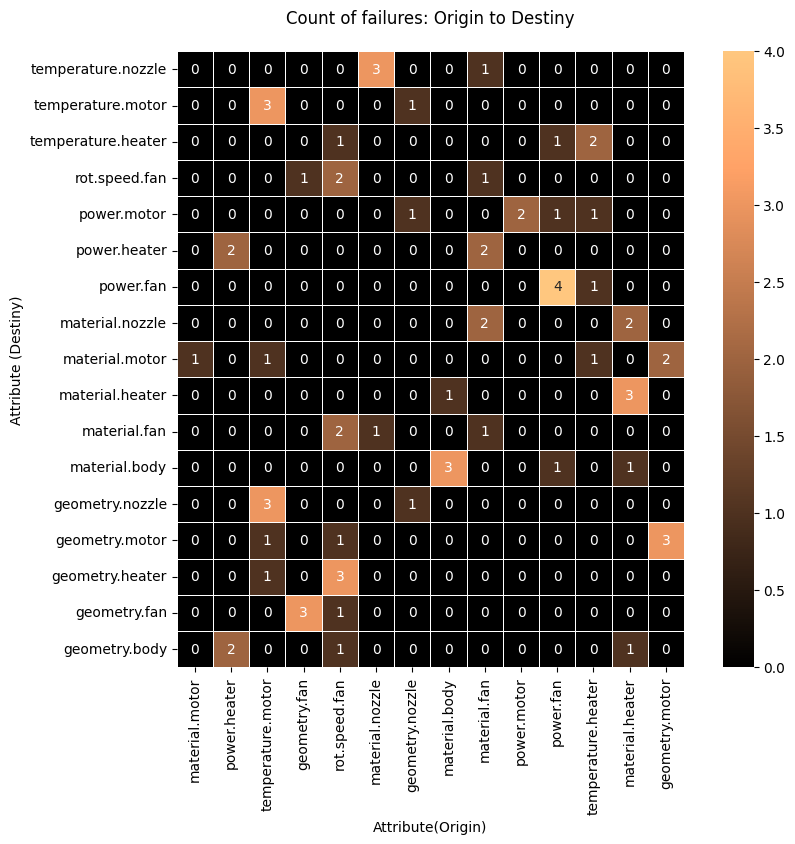

In [11]:
plot_heatmap(count_values=result)

In [43]:
comp1= Component(name='Comp1')
Comp2= Component(name='Comp2')
attr1= Propriety(name='att1',component=comp1,risk=1)
attr2= Propriety(name='att2',component=Comp2,risk=1)
attr3= Propriety(name='att1',component=Comp2,risk=1)

attr_=[attr1,attr2,attr3]
names=[attr.name for attr in attr_]

Component created named Comp1
Component created named Comp2
Atribute named att1 linked to Comp1
Atribute named att2 linked to Comp2
Atribute named att1 linked to Comp2


In [47]:
teste= 'att2'
indices = [index for index, name in enumerate(names) if name == teste]
if len(indices)==1:
    print("oi")


oi
